## Model comparison debugging

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
fit = np.load('/mnt/hpc_backup/yanitski/projects/pdr/KT3_history/MilkyWay/fit_results/COGAL/co1_test_regridded/CO 1/r400_rcmz0_uv10_loglikelihood.npy')

In [3]:
(fit==0).any()

False

In [4]:
fit.shape

(5, 701, 361)

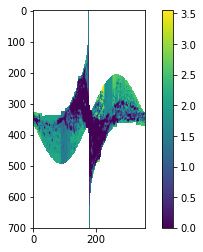

In [23]:
fit[fit == 0] = np.nan
cb = plt.imshow(10**fit[2, :, :])
plt.colorbar(cb)

In [3]:
lst = ['one', 'two', 'three']
lst_del = []
for e in lst:
    if 'ee' in e:
        lst.remove(e)
        lst_del.append(e)
lst, lst_del

(['one', 'two'], ['three'])

In [4]:
for i,j in zip(lst, [1, 2]):
    print(i, j)

one 1
two 2


# 

using `kosmatau3d`... (coming soon)

In [ ]:
from kosmatau3d import comparison as comp

path = '/mnt/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/'
target_header = {
    'NAXIS': 3,
    'NAXIS1': 361,
    'NAXIS2': 181,
    'NAXIS3': 701,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0,
    'CDELT1': 1,
    'CRPIX1': 181,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0,
    'CDELT2': 1,
    'CRPIX2': 91,
    'CTYPE3': 'VELO',
    'CRVAL3': 0,
    'CDELT3': 1,
    'CRPIX3': 351,
}
kernel_sigma = 0.5
target_kernel = (
    'gauss1d',
    (kernel_sigma,),
    kernel_sigma*3,
    kernel_sigma/2,
)
mission = ['Mopra']#['COGAL', 'SEDIGISM', 'Mopra', 'ThrUMMS']

In [ ]:
comp.regrid_observations(
    path=path,
    mission='COGAL',
    target_header=target_header,
    target_kernel=target_kernel,
)

In [ ]:
comp.view_observation(
    path=path,
    mission='COGAL',
    regridded_path='/regridded/temp/',
    # regridded_path='/regridded/',
    list_observations=False,
    # regridded_path='',
    # filename='G300.5-12CO_Vfull_regridded.fits',
    #FIRAS HIGH: CO 6, C 2, C+ 1, O 1
    #FIRAS HRES:
    # filename='FIRAS_LINE_EMISSION_MAP_HIGH_regridded.fits',
    # filename='dust_COM_CompMap_dust-commander_0256_R2.00.fits',
    # filename='co1_test_regridded_error.fits',
    filename='co1_test_regridded.fits',
    # filename='13co2_test_regridded_error.fits',
    # filename='13co2_test_regridded.fits',

    # filename='G001_13CO21_Tmb_DR1.fits',
    transition='CO 1',
    plot='integrated',
    integrate_b=[89, 93],
    # i_lat=91,
    # ylabel=r'$I_{CII}$ $(nW \ m^{-2} \ sr^{-1})$',
    clabel=r'$\int T_{B}db$ $(K^\circ)$',
    # title=r'COGAL CO $1 \rightarrow 0$',
    scale=0.5,
    logval=False,
    vmin=-2,
    vmax=100,
    # xlim=[60, 180],
    # ylim=[-200, 200],
    # cmap='gist_ncar',
    cmap='jet',
    save=False,
)

In [ ]:
# Available directories:
# - '/r400_cm{}-{}_d{}_uv{:.0f}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [1.0, 2.0], [0.25, 0.5, 1.0, 2.0, 4.0], [10, 100]]
# - '/r400_fcm{}_ficm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], [0.25, 0.5, 1.0, 2.0, 4.0]]
# - '/r400_fcm{}_cm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['0_2', '0_3', '1_2', '1_3']]
# - '/r400_ficm{}_icm{}/'
#   [[0.25, 0.5, 1.0, 2.0, 4.0], ['-2', '-2_-1', '-3_-1', '-3_-2']]
# - '/r400_rcmz{:.0f}_uv{}/'
#   [np.arange(0, 3001, 200), [10, 50, 100]]
comp.model_selection(
    mission=None,
    PLOT=False,
    debug=False,
    cmap='viridis',
    model_dir='/r400_rcmz{:.0f}_uv{}/',
    model_param=[np.arange(0, 3001, 200), [10, 50, 100]],
    PRINT=True,
)

In [ ]:
# This should be set to used to create plots of the model comparison for
#  various 2-dimensional grids. For grids with more parameters, the other
#  parameters will be identified via subplots.
comp.plot_comparison(
    file_format='r400_rcmz{:.0f}_uv{}',
    missions=['COBE-FIRAS', 'COGAL'],
    model_param=[np.arange(0, 3001, 200), [10, 50, 100]],
    xlabel=r'$R_{CMZ}$',
    ylabel=r'$f_{FUV}$',
    clabel=r'$log_{10}(\mathcal{L})$'
)